In [1]:
import os
os.path

from datetime import datetime, timedelta
import cmocean

import pyproj
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import trajan as ta
import pandas as pd

import opendrift
from opendrift.models.oceandrift import OceanDrift
from opendrift.readers import reader_netCDF_CF_generic
from opendrift.models.physics_methods import wind_drift_factor_from_trajectory, distance_between_trajectories, skillscore_liu_weissberg

import cartopy.crs as ccrs
from matplotlib.lines import Line2D

from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [2]:
ag_area_back = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/agul1000_area_back.out')
ag_area_fwd_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/agul1000_area_forward.out')
ag_sepdis_fwd_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/agul1000_sepdis_fwd.out')
ag_sepdis_back_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/agul1000_sepdis_back.out')
ag_msd_hits = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/agul1000_msd_fwd.out')
ag_msd_hits_back = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/agul1000_msd_back.out')
ag_n = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/agul1000_n.out')

In [3]:
rf_area_back = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/rfl1000_area_back.out')
rf_area_fwd_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/rfl1000_area_forward.out')
rf_sepdis_fwd_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/rfl1000_sepdis_fwd.out')
rf_sepdis_back_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/rfl1000_sepdis_back.out')
rf_msd_hits = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/rfl1000_msd_fwd.out')
rf_msd_hits_back = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/rfl1000_msd_back.out')
rf_n = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/rfl1000_n.out')

In [4]:
rt_area_back = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/ret1000_area_back.out')
rt_area_fwd_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/ret1000_area_forward.out')
rt_sepdis_fwd_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/ret1000_sepdis_fwd.out')
rt_sepdis_back_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/ret1000_sepdis_back.out')
rt_msd_hits = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/ret1000_msd_fwd.out')
rt_msd_hits_back = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/ret1000_msd_back.out')
rt_n = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/backtracking/pick_random_fwd_as_truth_oceandrift_48h/ret1000_n.out')

In [5]:
ed_area_back = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/pick_random_fwd_as_truth_oceandrift_48h/area1000_area_back.out')
ed_area_fwd_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/pick_random_fwd_as_truth_oceandrift_48h/area1000_area_forward.out')
ed_sepdis_fwd_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/pick_random_fwd_as_truth_oceandrift_48h/area1000_sepdis_fwd.out')
ed_sepdis_back_new = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/pick_random_fwd_as_truth_oceandrift_48h/area1000_sepdis_back.out')
ed_msd_hits = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/pick_random_fwd_as_truth_oceandrift_48h/area1000_msd_fwd.out')
ed_msd_hits_back = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/pick_random_fwd_as_truth_oceandrift_48h/area1000_msd_back.out')
ed_n = np.loadtxt('C:/Users/bente/Documents/BACKTRACK/pick_random_fwd_as_truth_oceandrift_48h/area1000_n.out')

In [6]:
n = np.concatenate([ag_n, rf_n, rt_n, ed_n])
n = np.array(n)[~np.isnan(np.array(n))]

In [7]:
msd_forward = np.concatenate([ag_msd_hits, rf_msd_hits, rt_msd_hits, ed_msd_hits])
msd_back = np.concatenate([ag_msd_hits_back, rf_msd_hits_back, rt_msd_hits_back, ed_msd_hits_back])

msd_back = np.array(msd_back)[~np.isnan(np.array(msd_back))]
msd_forward = np.array(msd_forward)[~np.isnan(np.array(msd_forward))]

In [8]:
sd_forward = np.concatenate([ag_sepdis_fwd_new, rf_sepdis_fwd_new, rt_sepdis_fwd_new, ed_sepdis_fwd_new])
sd_back = np.concatenate([ag_sepdis_back_new, rf_sepdis_back_new, rt_sepdis_back_new, ed_sepdis_back_new])

sd_back = np.array(sd_back)[~np.isnan(np.array(sd_back))]
sd_forward = np.array(sd_forward)[~np.isnan(np.array(sd_forward))]

In [9]:
area_forward = np.concatenate([ag_area_fwd_new, rf_area_fwd_new, rt_area_fwd_new, ed_area_fwd_new])
area_back = np.concatenate([ag_area_back, rf_area_back, rt_area_back, ed_area_back])

area_back = np.array(area_back)[~np.isnan(np.array(area_back))]
area_forward = np.array(area_forward)[~np.isnan(np.array(area_forward))]

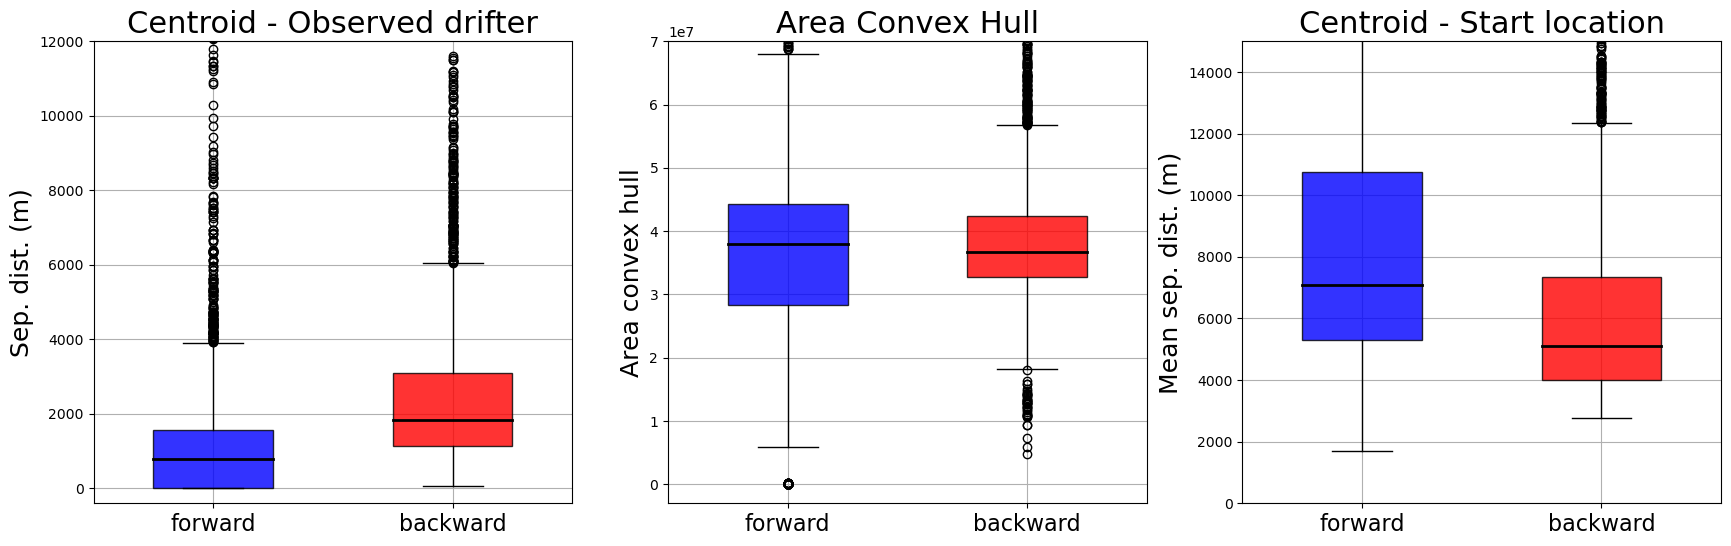

In [16]:
plt.figure(figsize=(21,6))

plt.subplot(1,3,2)
plt.boxplot(area_back, positions=[2], patch_artist=True, boxprops=dict(facecolor='red', alpha=0.8), medianprops=dict(color='black', linewidth=2), widths = 0.5)
plt.boxplot(area_forward, positions=[1], patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.8), medianprops=dict(color='black', linewidth=2), widths = 0.5)
plt.xticks([1,2],['forward', 'backward'], fontsize=16)
plt.ylabel('Area convex hull', fontsize=18)
plt.ylim([-0.03e8,0.7e8])
plt.title('Area Convex Hull', fontsize=22)
plt.grid()

plt.subplot(1,3,1)
plt.boxplot(sd_back, positions=[2], patch_artist=True, boxprops=dict(facecolor='red', alpha=0.8), medianprops=dict(color='black', linewidth=2), widths = 0.5)
plt.boxplot(sd_forward, positions=[1], patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.8), medianprops=dict(color='black', linewidth=2), widths = 0.5)
plt.xticks([1,2],['forward', 'backward'], fontsize=16)
plt.ylabel('Sep. dist. (m)', fontsize=18)
plt.title('Centroid - Observed drifter', fontsize=22)
plt.ylim([-400,12000])
plt.grid()

plt.subplot(1,3,3)
plt.boxplot(msd_back, positions=[2], patch_artist=True, boxprops=dict(facecolor='red', alpha=0.8), medianprops=dict(color='black', linewidth=2), widths = 0.5)
plt.boxplot(msd_forward, positions=[1], patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.8), medianprops=dict(color='black', linewidth=2), widths = 0.5)
plt.xticks([1,2],['forward', 'backward'], fontsize=16)
plt.ylabel('Mean sep. dist. (m)', fontsize=18)
plt.title('Centroid - Start location', fontsize=22)
plt.ylim([0,15000])
plt.grid()

In [56]:
n>100

array([False, False, False, ..., False, False, False])

In [72]:
ag_msd_forward_new = []
ag_msd_back_new = []
ag_sd_forward_new = []
ag_sd_back_new = []
ag_area_forward_new = []
ag_area_back_new = []
ag_n_new = []

for i in range(len(ag_n)):
    if ag_n[i]<100:
        ag_area_forward_new.append(ag_area_fwd_new[i])
#         ag_area_back_new.append(ag_area_back[i])
        ag_sd_forward_new.append(ag_sepdis_fwd_new[i])
        ag_sd_back_new.append(ag_sepdis_back_new[i])
        ag_msd_forward_new.append(ag_msd_hits[i])
        ag_msd_back_new.append(ag_msd_hits_back[i])
        ag_n_new.append(ag_n[i])
        

In [73]:
msd_forward_new = np.concatenate([ag_msd_forward_new, rf_msd_hits, rt_msd_hits, ed_msd_hits])
msd_back_new = np.concatenate([ag_msd_back_new, rf_msd_hits_back, rt_msd_hits_back, ed_msd_hits_back])

msd_back_new = np.array(msd_back_new)[~np.isnan(np.array(msd_back_new))]
msd_forward_new = np.array(msd_forward_new)[~np.isnan(np.array(msd_forward_new))]


sd_forward_new = np.concatenate([ag_sd_forward_new, rf_sepdis_fwd_new, rt_sepdis_fwd_new, ed_sepdis_fwd_new])
sd_back_new = np.concatenate([ag_sd_back_new, rf_sepdis_back_new, rt_sepdis_back_new, ed_sepdis_back_new])

sd_back_new = np.array(sd_back_new)[~np.isnan(np.array(sd_back_new))]
sd_forward_new = np.array(sd_forward_new)[~np.isnan(np.array(sd_forward_new))]


area_forward_new = np.concatenate([ag_area_forward_new, rf_area_fwd_new, rt_area_fwd_new, ed_area_fwd_new])
area_back_new = np.concatenate([ag_area_back_new, rf_area_back, rt_area_back, ed_area_back])

area_back_new = np.array(area_back_new)[~np.isnan(np.array(area_back_new))]
area_forward_new = np.array(area_forward_new)[~np.isnan(np.array(area_forward_new))]

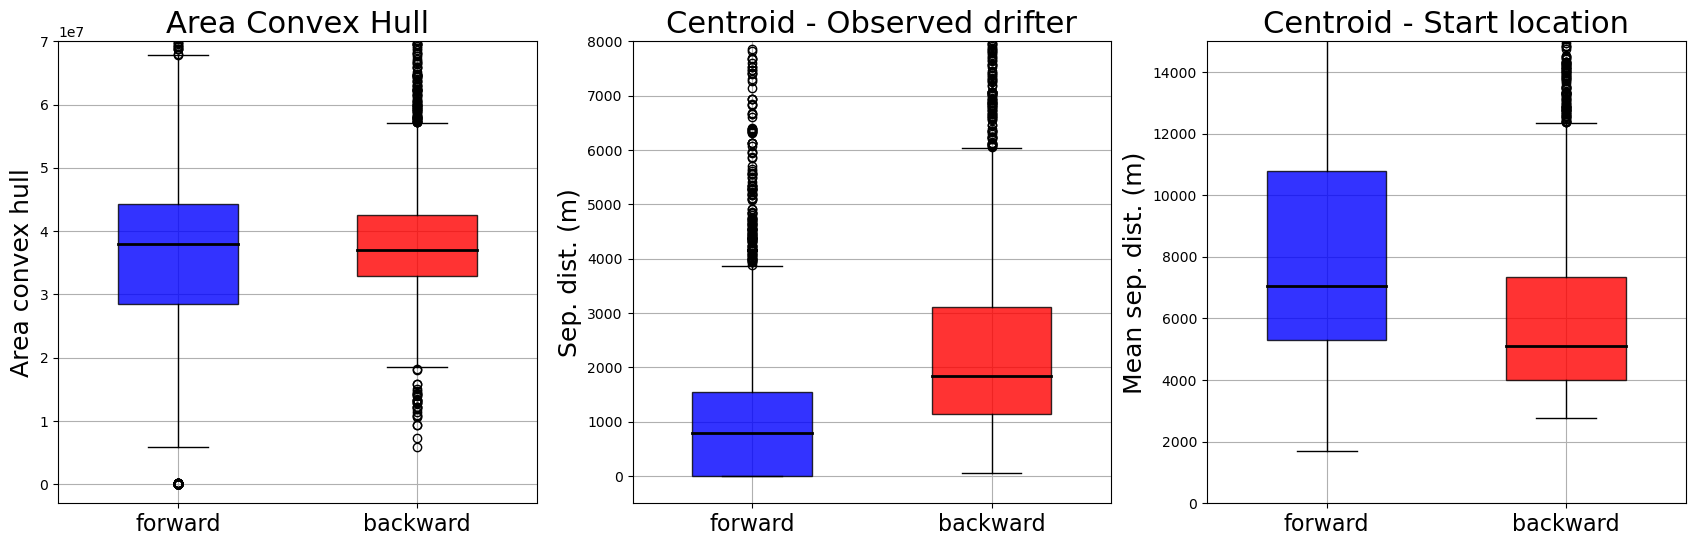

In [74]:
plt.figure(figsize=(21,6))

plt.subplot(1,3,1)
plt.boxplot(area_back_new, positions=[2], patch_artist=True, boxprops=dict(facecolor='red', alpha=0.8), medianprops=dict(color='black', linewidth=2), widths = 0.5)
plt.boxplot(area_forward_new, positions=[1], patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.8), medianprops=dict(color='black', linewidth=2), widths = 0.5)
plt.xticks([1,2],['forward', 'backward'], fontsize=16)
plt.ylabel('Area convex hull', fontsize=18)
plt.ylim([-0.03e8,0.7e8])
plt.title('Area Convex Hull', fontsize=22)
plt.grid()

plt.subplot(1,3,2)
plt.boxplot(sd_back_new, positions=[2], patch_artist=True, boxprops=dict(facecolor='red', alpha=0.8), medianprops=dict(color='black', linewidth=2), widths = 0.5)
plt.boxplot(sd_forward_new, positions=[1], patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.8), medianprops=dict(color='black', linewidth=2), widths = 0.5)
plt.xticks([1,2],['forward', 'backward'], fontsize=16)
plt.ylabel('Sep. dist. (m)', fontsize=18)
plt.title('Centroid - Observed drifter', fontsize=22)
plt.ylim([-500,8000])
plt.grid()

plt.subplot(1,3,3)
plt.boxplot(msd_back_new, positions=[2], patch_artist=True, boxprops=dict(facecolor='red', alpha=0.8), medianprops=dict(color='black', linewidth=2), widths = 0.5)
plt.boxplot(msd_forward_new, positions=[1], patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.8), medianprops=dict(color='black', linewidth=2), widths = 0.5)
plt.xticks([1,2],['forward', 'backward'], fontsize=16)
plt.ylabel('Mean sep. dist. (m)', fontsize=18)
plt.title('Centroid - Start location', fontsize=22)
plt.ylim([0,15000])
plt.grid()

{'whiskers': [<matplotlib.lines.Line2D at 0x18f4d441c50>,
 'caps': [<matplotlib.lines.Line2D at 0x18f4d442f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x18f4d4413d0>],
 'medians': [<matplotlib.lines.Line2D at 0x18f4d44c110>],
 'fliers': [<matplotlib.lines.Line2D at 0x18f4d318e50>],
 'means': []}

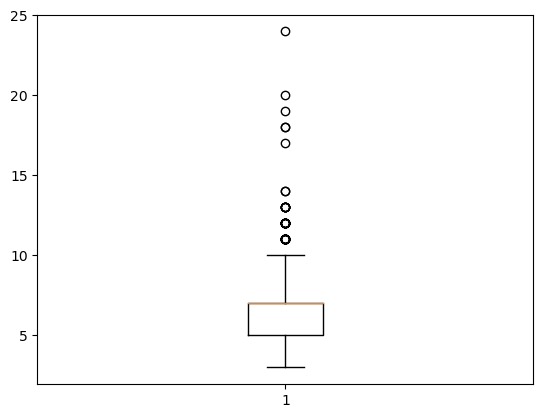

In [77]:
plt.boxplot(n_new)
# plt.ylim([-1, 10])


In [82]:
np.mean(n_new)

6.570569508312699

In [83]:
np.median(n_new)

7.0

In [84]:
np.min(n_new)

3.0

In [85]:
np.max(n_new)

24.0